## Project 2 RLC Oscillations

Due Mon Nov 4, 9am

Objective: Use odeint() to solve the differential equation governing a series RLC circuit.




Edit this cell to include the names and descriptions of the contributions of anybody __other than yourself__ who contributed to this work.


1) Choose random values of L and C. For each, choose a random integer, $I_R$, between -2 and -9 for the exponent and a random floating point number, $F_R$ between 0 and 1. The inductance or capacitance is then given by $F_R$ x 10$^{I_R}$ (Farads or Henries).
       
Then calculate three values of R: to represent the underdamped, critically damped and overdamped cases (take  m = 0.1, 1, and 5).


In [57]:
# This script creates an error of resistances corresponding to a underdamped,
# critically damped, and overdamped circuit
import numpy as np
import random

# inductance, Henry
L = random.random()*10**(random.uniform(-2, -9))

# Cacpitance, Farad
C = random.random()*10**(random.uniform(-2, -9))

# mass, kg
m = np.array([0.1, 1, 1.5])

# R values underdamped, critcallly damped and overdamped; Ohms
resistance = 2*m*np.sqrt(L/C)

2) Generate a figure that shows the time evolution of I(t) for the three cases above, for $\omega = \omega_0$.  Start with the inital conditions: q(0) = I(0) = 0. In these figures you should show the transient behaviour and the transition to stable oscillation. The figure should be three vertically stacked subplots, each showing the behaviour for one value of m.

Make sure you choose your time interval and time steps wisely so that you capture the behaviour of the oscillator. One challenge is to write the program so that it accepts the large range of values of the input parameters and still generates plots showing the requested features.

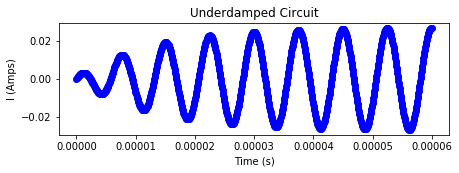

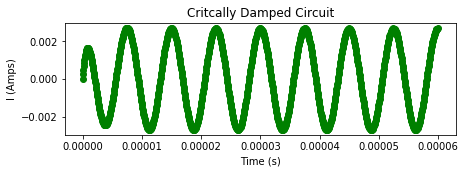

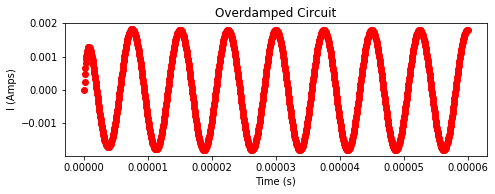

In [153]:
# This script plots the current of against time of each type of the
# following types of circuits: underdamped, crtically damped and overdamped.
# The angular frequency is set to the natural frequency
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# initial conditions
# Current, Amps
I0 = 0

# total charge flowing
q = 0

# natural frequency, Hz
w0 = 1/np.sqrt(L*C)

# angular frequency, Hz
w = w0

# Voltage amplitude
V0 = 1

# Starting time
t_0 = 0

# end time of model 
tmax = 8*(2*np.pi)/w

# number of points needed for plots
steps = 10**(len(str(round(w)))//2 - 1)


def model(yAF, t0, R):
    """" Calculate the time derivatives for current

    Arguments:
    yAF: Array of variables where yAF[0] is current and yAF[2] is charge
    t0: The time, but not used explicitly
    R: resistance of circuit

    Returns:
    Array of 2 variables. 1st item dI/dt, 2nd item is current(dq/dt)
    """
    # Sinusodial voltage supply
    Vt = V0*np.cos(w*t0)
    dqdt = yAF[0]
    dq2dt = Vt/L - yAF[1]/(L*C) - (R*dqdt)/L
    return np.array([dq2dt, dqdt])  # return dI/dt, dq/dt


# Time over which we're ploting the current,
# and initial conditions of the circuit in an array.
# It will be used to get the model
time = np.linspace(t_0, tmax, steps)
initcond = np.array([I0, q])


for i in range(len(resistance)):
    plt.figure(figsize=(7, 7))
    plt.subplot(311+i)
    
    # set axes for plots
    plt.ylabel("I (Amps)")
    plt.xlabel("Time (s)")

    # Get model based on resistance value
    M = odeint(model, initcond, time, args=(resistance[i],))

    if(i == 0):  # plot underdamped model
        plt.plot(time, M[:, 0], 'bo')
        plt.title("Underdamped Circuit")

    elif(i == 1):  # plot critically damped model
        plt.plot(time, M[:, 0], 'go')
        plt.title("Critcally Damped Circuit")

    else:  # plot overdamped model
        plt.plot(time, M[:, 0], 'ro')
        plt.title("Overdamped Circuit")

plt.tight_layout()
plt.show()

 3) Generate another figure containing three resonance plots, again as three vertically stacked subplots. Each panel should show a plot of the current, I, vs frequency for a range from $0.1\omega_0/2\pi$  to $2\omega_0/2\pi$. The three panels should show the resonance curves for the same three cases described above. For each point you plot, the I you take should represent the peak-to-peak response for $V_0$ = 1V peak to peak after the transient behaviour has died away and the solution stabilizes to a steady sinusoidal oscillation. Your calculations should be made at frequencies spaced closely enough that when plotted with a continuous line, the curves are smooth. The values of R, L and C should be indicated in the titles of each panel. The plots should use Hz units ($\omega_2\pi$).



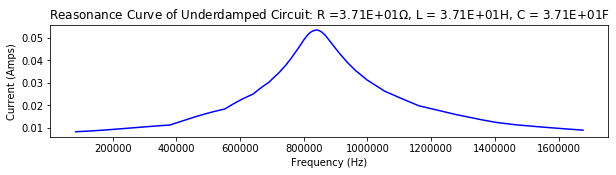

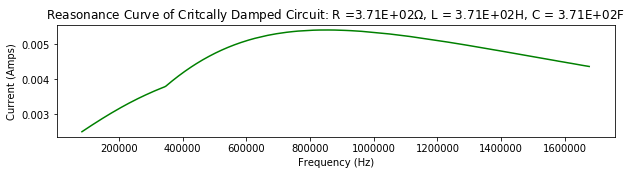

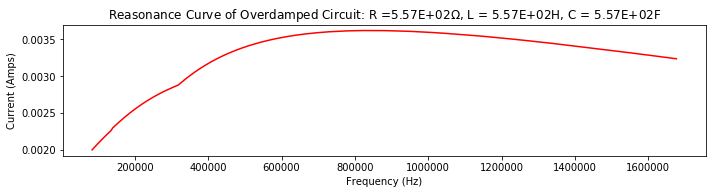

In [154]:
# This scripts plots the resonance curves of the following cirucits:
# underdamped, critically dampned and overdamped. The frequency
# ranges from 0.1w0/2pi to 2w0/2pi

# frequencies, Hz
w = np.linspace(0.1*w0, 2*w0, 400)

def Model_2(yAF, tf, R, w):
    """Calculate the time derivatives for current

    Arguments:
        yAF: array inital current and charge
        tF: time. Not explicitly used
        R: resistance
        w: frequency

    Returns:
     Array of 2 variables. 1st item dI/dt, 2nd item is current(dq/dt)
    """
    # Sinsuodial voltage supply where we vary the frequency
    Vt = V0*np.cos(w*tf)
    dqdt = yAF[0]
    dq2dt = Vt/L - yAF[1]/(L*C) - (R*dqdt)/L
    return np.array([dq2dt, dqdt])


for i in range(len(resistance)):
    # list where max voltage at each frequency will be stored
    maxV = []

    for j in range(len(w)):
        # Get model at jth frequency
        M = odeint(Model_2, initcond, time, args=(resistance[i], w[j]))
        # get peak to peak response
        maxV.append(np.max(M[:, 0]) - np.min(M[:, 0]))

    plt.figure(figsize=(10, 7))
    plt.subplot(311+i)
    # set axes for plots
    plt.ylabel("Current (Amps)")
    plt.xlabel("Frequency (Hz)")

    if(i == 0):
        # plot underdamped model
        plt.plot(w, maxV, 'b')
        plt.title("Reasonance Curve of Underdamped Circuit: "
                  "R ={0:0.2E}$\Omega$, L = {0:0.2E}H, C = {0:0.2E}F"
                  .format(resistance[i], L, C))
    elif(i == 1):
        # plot critically damped model
        plt.plot(w, maxV, 'g')
        plt.title("Reasonance Curve of Critcally Damped Circuit: "
                  "R ={0:0.2E}$\Omega$, L = {0:0.2E}H, C = {0:0.2E}F"
                  .format(resistance[i], L, C))
    else:
        # plot overdamped model
        plt.plot(w, maxV, 'r')
        plt.title("Reasonance Curve of Overdamped Circuit: "
                  "R ={0:0.2E}$\Omega$, L = {0:0.2E}H, C = {0:0.2E}F"
                  .format(resistance[i], L, C))

plt.tight_layout()
plt.show()

Use the cell below for any project extensions you choose to include. Feel free to repeat code from above.

In the cell below describe any new functions/language features you have incorporated, and the details of any extensions to the project you have implemented.

YOUR ANSWER HERE